| Project name   |  Detector de alcohol |
|:----------|:-------------|
| **Autor(S)**| T034628, Jorge Cerda<br>T029834, Mariana Monroy<br> T035073, Raúl Ramírez |
| **Editor**|Dr. Adán Hirales Carbajal|
| **Last update** |  |

# **Introducción**

Este proyecto sirve como una propuesta para implementar sensores en los teléfonos para la detección de personas en estado de ebriedad, se verá el riesgo que con lleva manejar en estado de ebriedad así como una prototipo para instalarse en el télefono para la detección de este grupo de personas.

# **Planteamiento del problema**

El consumo de alcohol es un fenómeno profundamente arraigado en muchas sociedades, desempeñando un papel destacado en la cultura y las interacciones sociales a lo largo de la historia. Sin embargo, su relación con la salud, la seguridad y el bienestar humano es complicada. El alcohol, cuando se consume con moderación y responsabilidad, puede ser parte de la vida cotidiana de muchas personas, aportando momentos de disfrute y relajación. No obstante, su consumo excesivo plantea riesgos significativos para la salud física y mental, así como para la seguridad pública.

El consumo de alcohol, siendo una práctica socialmente aceptada en muchos contextos, toma un cambio peligroso cuando se entrelaza con la actividad de conducir. Esta confluencia de factores da lugar a un tema de gran relevancia: conducir en estado de ebriedad. Conducir bajo los efectos del alcohol es un tema de vital importancia en la seguridad vial, que plantea serias preocupaciones en todo el mundo. La combinación de alcohol y la conducción representa un riesgo significativo para la vida de quienes utilizan las carreteras, así como para peatones y otros usuarios. Según Cassanova (2021) en la investigación "El alcohol como factor de riesgo en accidentes vehiculares y peatonales" concluyeron después de aplicar varias pruebas a hombres y mujeres que los sujetos que sufren accidentes tienden a beber con menor frecuencia pero en grandes cantidades en una sola ocasión, dandonos a entender que los accidentes son ocasionados cuando el alcohol es un factor porque el sujeto en cuestión tomo una cantidad excesiva de alcohol antes de manejar.

En la mayoría de las jurisdicciones en México, conducir bajo los efectos del alcohol es una violación grave de la ley, y las sanciones varían desde multas sustanciales hasta la suspensión o revocación de la licencia de manejo, e incluso penas de prisión en casos más severos. Sin embargo, más allá de las consecuencias legales, los accidentes causados por conductores ebrios dejan un rastro de dolorosas consecuencias en la comunidad, de acuerdo al Gobierno de México (2019), en México cada año 24 mil muertes se registran a nivel nacional por accidentes automovilísticos relacionados al consumo de alcohol, haciendo que el país ocupe el 7º lugar mundial en muertes por esta causa. Además, el costo en términos de recursos médicos y de seguridad vial es significativo.


Dicho lo anterior, para abordar eficazmente este problema, es esencial tanto la educación pública sobre los peligros del alcohol al volante como la implementación de medidas de prevención y control. Por ende, con el propósito de prevenir este tipo de accidentes, el proyecto tiene como objetivo poner un sensor en los celulares en la posición donde las personas comúnmente ponen sus bocas al momento de hablar por teléfono, para que de esta forma el sensor puede evaluar la cantidad de alcohol en su aliento y mandar una señal de alerta cuando evalué si la cantidad de alcohol puede ser peligroso para manejar.


---



Referencias:
Casanova, L., Borges, G., Mondragón, L., Medina-Mora, M. E., & Cherpitel, C. (2001). El alcohol como factor de riesgo en accidentes vehiculares y peatonales. Salud Mental, 24(5), 3-11.

Gobierno de México. (2019). Triptico Alcohol y Accidentes 2019. https://www.gob.mx/cms/uploads/attachment/file/566152/Triptico_Alcohol_y_Accidentes_2019.pdf


### <span style="color:blue">Hardware requirements</span>


|Component|Quantity|Characteristics|Component|
|:---|:---|:-----|:---:|
|STM32 F413ZHT6|1| Development board||
|HW-131 |1| Capacidad de alimentación de 3.3 o 5 V, con un rango de 6 a 12 V para poder funcionar correctamente ||
|ULPSM-EtOH| 1| Tipo: Sensor de etanol
||


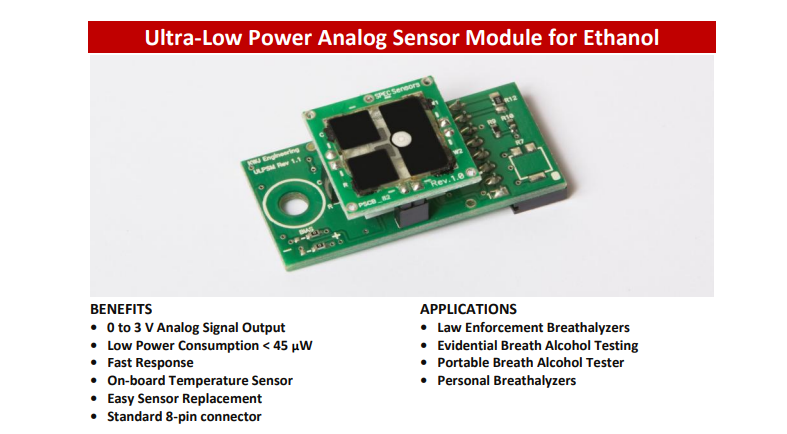

# **Metodología**

Se conecto el sensor a la STM para registrar los datos que captaba el mismo y se despliega en la computadora los resultados, para no exponer a los investigadores simulas la boca de una persona con un envase donde contenía alcohol, se cambió la posición del sensor para simular distintas formas en que las personas agarran el télefono al hablar.

Posición 1

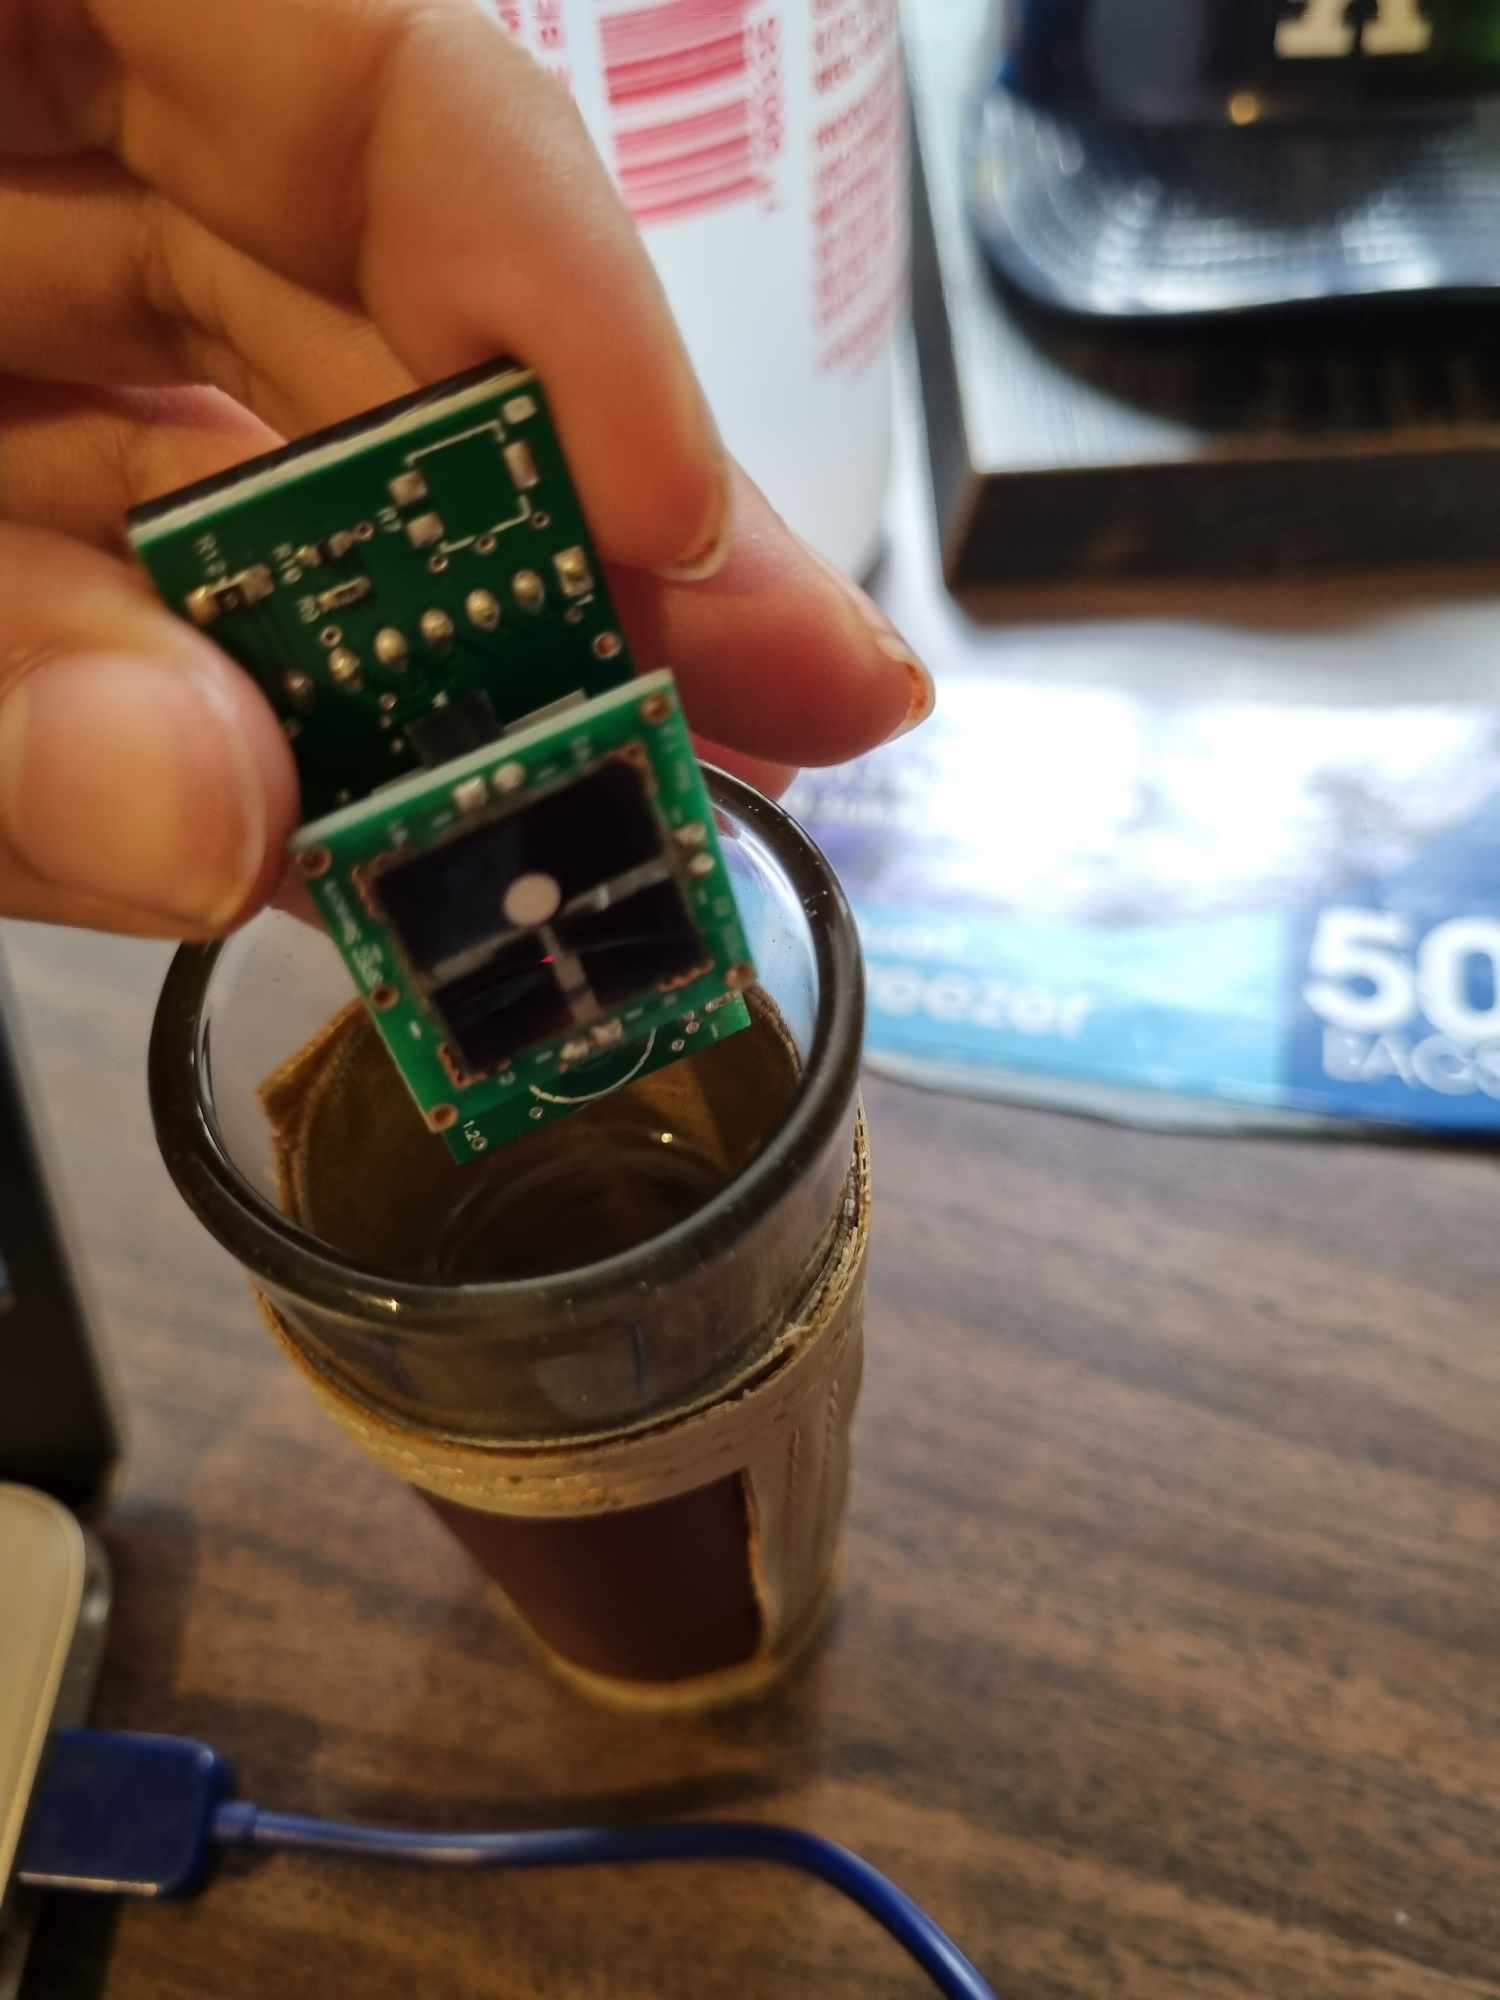

Posicion 2

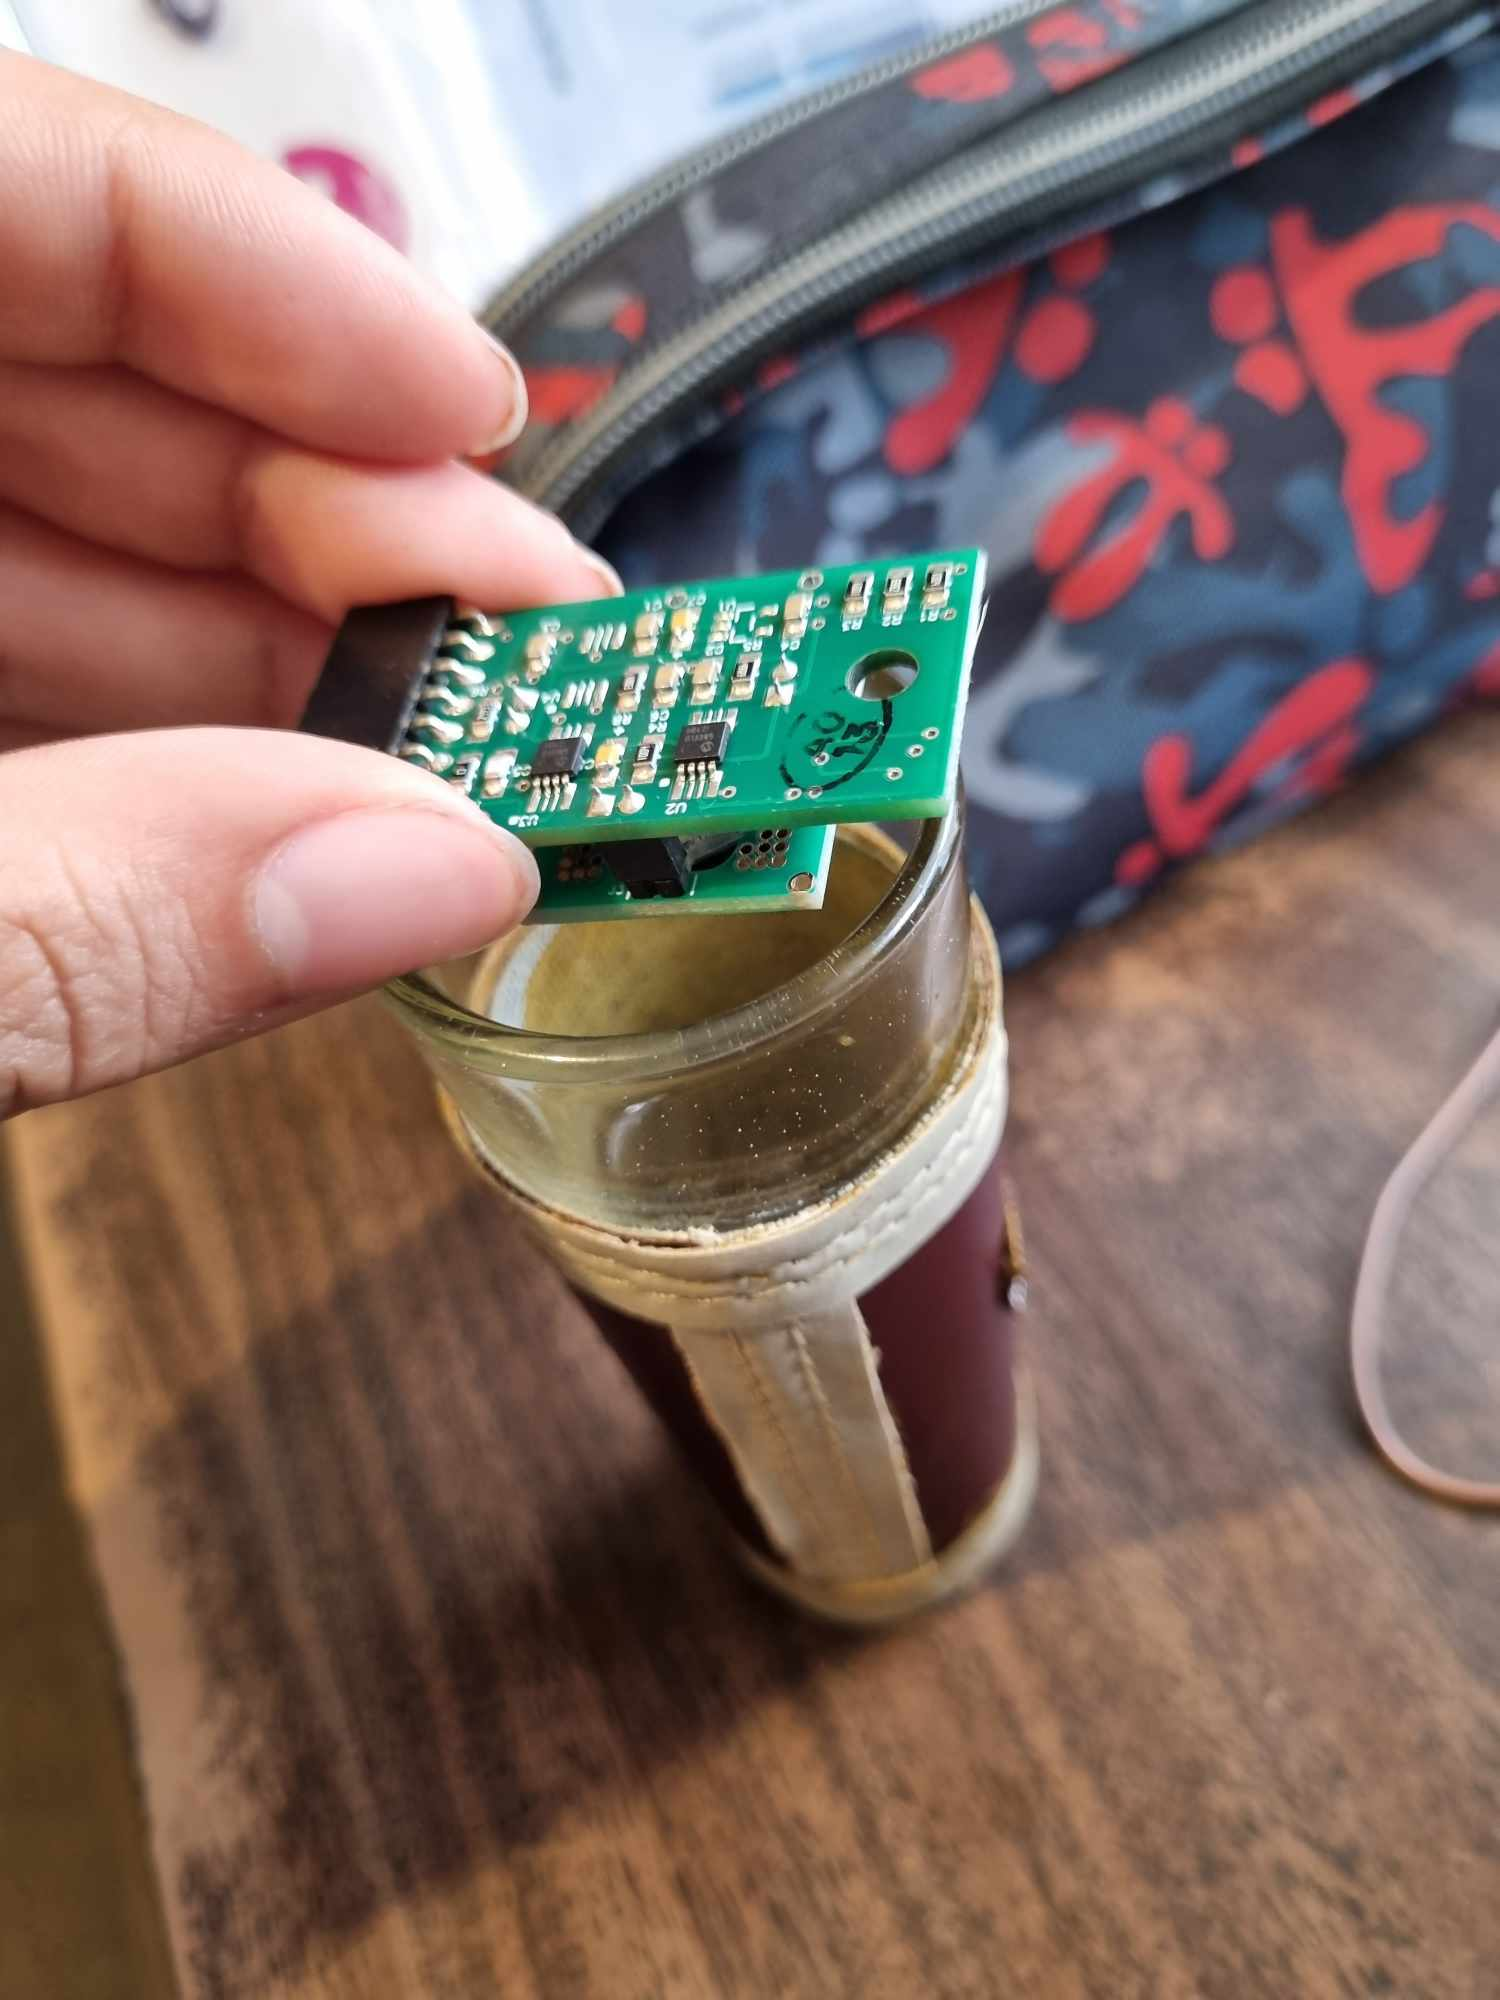

Posición 3

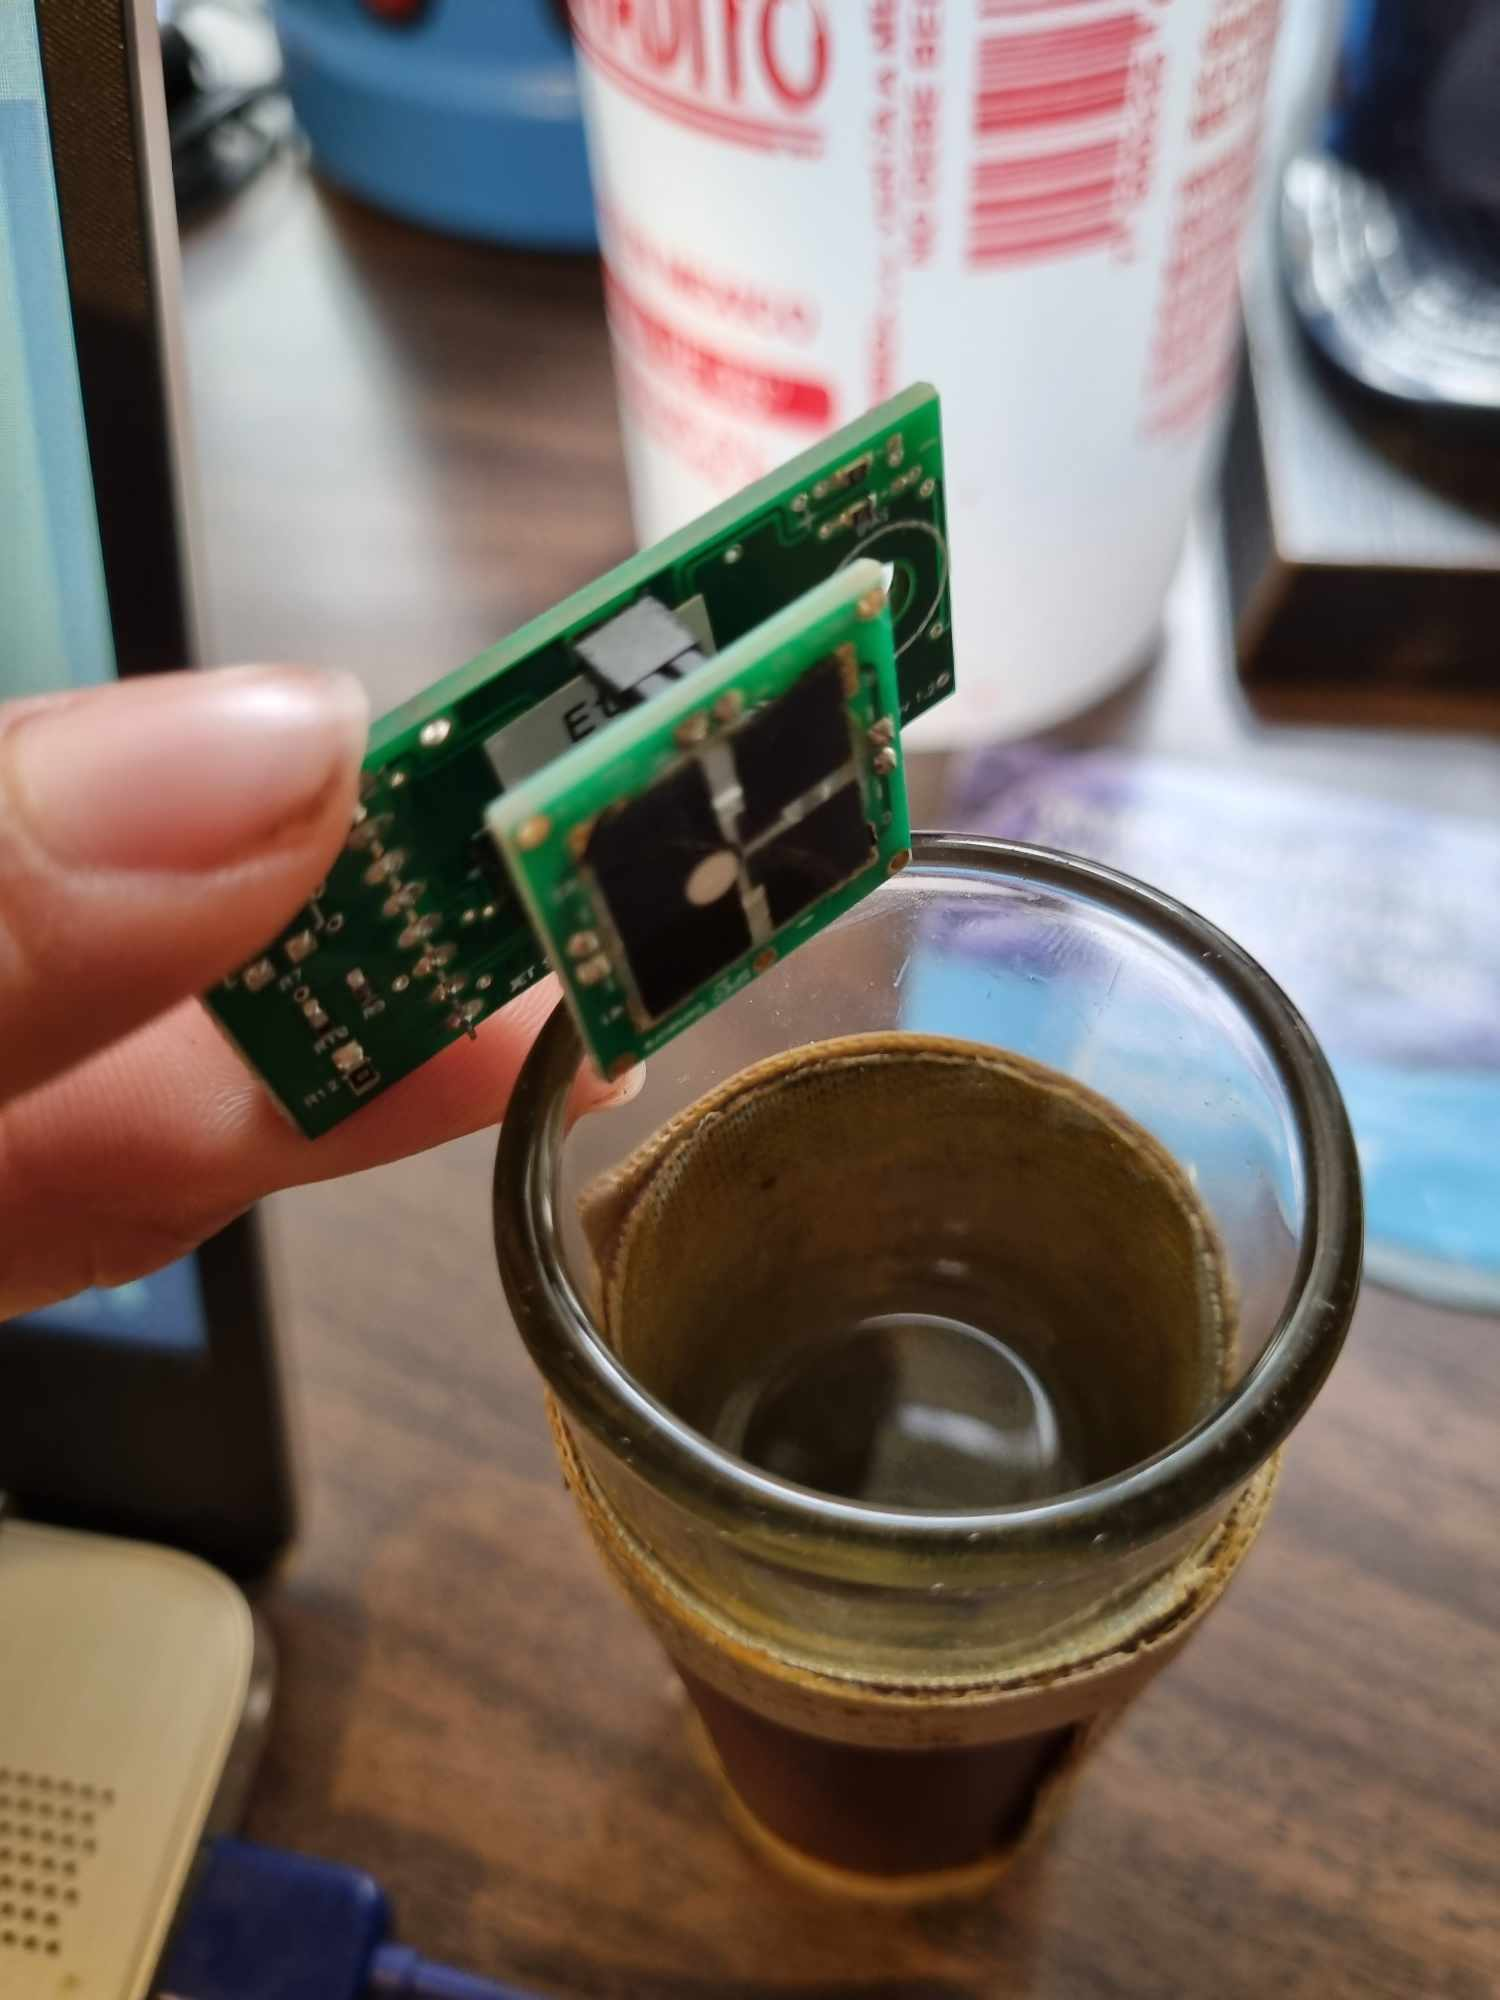

Implementación del código

main.c

In [ ]:
/* USER CODE BEGIN Header */
/**
  ******************************************************************************
  * @file           : main.c
  * @brief          : Main program body
  ******************************************************************************
  * @attention
  *
  * Copyright (c) 2023 STMicroelectronics.
  * All rights reserved.
  *
  * This software is licensed under terms that can be found in the LICENSE file
  * in the root directory of this software component.
  * If no LICENSE file comes with this software, it is provided AS-IS.
  *
  ******************************************************************************
  */
/* USER CODE END Header */
/* Includes ------------------------------------------------------------------*/
#include "main.h"
#include "cmsis_os.h"

/* Private includes ----------------------------------------------------------*/
/* USER CODE BEGIN Includes */
#include <stdio.h>
#include <string.h>
/* USER CODE END Includes */

/* Private typedef -----------------------------------------------------------*/
/* USER CODE BEGIN PTD */

/* USER CODE END PTD */

/* Private define ------------------------------------------------------------*/
/* USER CODE BEGIN PD */

/* USER CODE END PD */

/* Private macro -------------------------------------------------------------*/
/* USER CODE BEGIN PM */

/* USER CODE END PM */

/* Private variables ---------------------------------------------------------*/
ADC_HandleTypeDef hadc1;

TIM_HandleTypeDef htim6;

UART_HandleTypeDef huart2;
UART_HandleTypeDef huart3;

osThreadId defaultTaskHandle;
/* USER CODE BEGIN PV */
uint16_t gas=0;
char msg[11];
TimerHandle_t ADC_TimerHandle;
TimerHandle_t UART_TimerHandle;

void ADC_TimerCallBack(TimerHandle_t xTimer);
void UART_TimerCallback(TimerHandle_t xTimer);

/* USER CODE END PV */

/* Private function prototypes -----------------------------------------------*/
void SystemClock_Config(void);
static void MX_GPIO_Init(void);
static void MX_ADC1_Init(void);
static void MX_USART2_UART_Init(void);
static void MX_TIM6_Init(void);
static void MX_USART3_UART_Init(void);
void StartDefaultTask(void const * argument);

/* USER CODE BEGIN PFP */
void UART_Task(void *pvParameters);
void ADC_Task(void *pvParameters);
/* USER CODE END PFP */

/* Private user code ---------------------------------------------------------*/
/* USER CODE BEGIN 0 */
void vApplicationGetTimerTaskMemory(StaticTask_t **ppxTimerTaskTCBBuffer, StackType_t **ppxTimerTaskStackBuffer, uint32_t *pulTimerTaskStackSize)
{
    /* Static memory allocation for the Timer task. */
    static StaticTask_t xTimerTaskTCB;
    static StackType_t uxTimerTaskStack[configTIMER_TASK_STACK_DEPTH];

    /* Pass the buffer pointers to FreeRTOS */
    *ppxTimerTaskTCBBuffer = &xTimerTaskTCB;
    *ppxTimerTaskStackBuffer = uxTimerTaskStack;
    *pulTimerTaskStackSize = configTIMER_TASK_STACK_DEPTH;
}
void ADC_TimerCallback(TimerHandle_t xTimer)
{
	gas = 0;
    HAL_ADC_Start(&hadc1);
    HAL_ADC_PollForConversion(&hadc1, 60000);
    gas = HAL_ADC_GetValue(&hadc1);
    HAL_GPIO_WritePin(GPIOB, GPIO_PIN_7, 1);
    if(gas > 0 && gas<255){
    	HAL_GPIO_WritePin(GPIOB, GPIO_PIN_14, 1);
    }
    else{
    	HAL_GPIO_WritePin(GPIOB, GPIO_PIN_14, 0);
    }
}
void UART_TimerCallback(TimerHandle_t xTimer)
{
    sprintf(msg, "Gas: %04d\r\n", gas);
    HAL_UART_Transmit(&huart3, (uint8_t*)msg, strlen(msg), HAL_MAX_DELAY);
    //HAL_UART_Transmit_IT(&huart3, (uint8_t*)msg, strlen(msg));
    HAL_GPIO_WritePin(GPIOB, GPIO_PIN_7, 0);
}
/* USER CODE END 0 */

/**
  * @brief  The application entry point.
  * @retval int
  */
int main(void)
{
  /* USER CODE BEGIN 1 */

  /* USER CODE END 1 */

  /* MCU Configuration--------------------------------------------------------*/

  /* Reset of all peripherals, Initializes the Flash interface and the Systick. */
  HAL_Init();

  /* USER CODE BEGIN Init */

  /* USER CODE END Init */

  /* Configure the system clock */
  SystemClock_Config();

  /* USER CODE BEGIN SysInit */

  /* USER CODE END SysInit */

  /* Initialize all configured peripherals */
  MX_GPIO_Init();
  MX_ADC1_Init();
  MX_USART2_UART_Init();
  MX_TIM6_Init();
  MX_USART3_UART_Init();
  /* USER CODE BEGIN 2 */

  /* USER CODE END 2 */

  /* USER CODE BEGIN RTOS_MUTEX */
  /* add mutexes, ... */
  /* USER CODE END RTOS_MUTEX */

  /* USER CODE BEGIN RTOS_SEMAPHORES */
  /* add semaphores, ... */
  /* USER CODE END RTOS_SEMAPHORES */

  /* USER CODE BEGIN RTOS_TIMERS */
  /* start timers, add new ones, ... */
  /* USER CODE END RTOS_TIMERS */

  /* USER CODE BEGIN RTOS_QUEUES */
  /* add queues, ... */
  /* USER CODE END RTOS_QUEUES */

  /* Create the thread(s) */
  /* definition and creation of defaultTask */
  osThreadDef(defaultTask, StartDefaultTask, osPriorityNormal, 0, 128);
  defaultTaskHandle = osThreadCreate(osThread(defaultTask), NULL);

  /* USER CODE BEGIN RTOS_THREADS */
  /* add threads, ... */


   ADC_TimerHandle = xTimerCreate("ADC Timer", pdMS_TO_TICKS(200), pdTRUE, (void*)0, ADC_TimerCallback);
   UART_TimerHandle = xTimerCreate("UART Timer", pdMS_TO_TICKS(200), pdTRUE, (void*)0, UART_TimerCallback);

    /* Start Timers */
    xTimerStart(ADC_TimerHandle, 0);
    xTimerStart(UART_TimerHandle, 0);

   vTaskStartScheduler();
  /* USER CODE END RTOS_THREADS */

  /* Start scheduler */
  osKernelStart();

  /* We should never get here as control is now taken by the scheduler */
  /* Infinite loop */
  /* USER CODE BEGIN WHILE */
  while (1)
  {

    /* USER CODE END WHILE */

    /* USER CODE BEGIN 3 */

  }
  /* USER CODE END 3 */
}

/**
  * @brief System Clock Configuration
  * @retval None
  */
void SystemClock_Config(void)
{
  RCC_OscInitTypeDef RCC_OscInitStruct = {0};
  RCC_ClkInitTypeDef RCC_ClkInitStruct = {0};

  /** Configure the main internal regulator output voltage
  */
  __HAL_RCC_PWR_CLK_ENABLE();
  __HAL_PWR_VOLTAGESCALING_CONFIG(PWR_REGULATOR_VOLTAGE_SCALE1);

  /** Initializes the RCC Oscillators according to the specified parameters
  * in the RCC_OscInitTypeDef structure.
  */
  RCC_OscInitStruct.OscillatorType = RCC_OSCILLATORTYPE_HSI;
  RCC_OscInitStruct.HSIState = RCC_HSI_ON;
  RCC_OscInitStruct.HSICalibrationValue = RCC_HSICALIBRATION_DEFAULT;
  RCC_OscInitStruct.PLL.PLLState = RCC_PLL_NONE;
  if (HAL_RCC_OscConfig(&RCC_OscInitStruct) != HAL_OK)
  {
    Error_Handler();
  }

  /** Initializes the CPU, AHB and APB buses clocks
  */
  RCC_ClkInitStruct.ClockType = RCC_CLOCKTYPE_HCLK|RCC_CLOCKTYPE_SYSCLK
                              |RCC_CLOCKTYPE_PCLK1|RCC_CLOCKTYPE_PCLK2;
  RCC_ClkInitStruct.SYSCLKSource = RCC_SYSCLKSOURCE_HSI;
  RCC_ClkInitStruct.AHBCLKDivider = RCC_SYSCLK_DIV1;
  RCC_ClkInitStruct.APB1CLKDivider = RCC_HCLK_DIV1;
  RCC_ClkInitStruct.APB2CLKDivider = RCC_HCLK_DIV1;

  if (HAL_RCC_ClockConfig(&RCC_ClkInitStruct, FLASH_LATENCY_0) != HAL_OK)
  {
    Error_Handler();
  }
}

/**
  * @brief ADC1 Initialization Function
  * @param None
  * @retval None
  */
static void MX_ADC1_Init(void)
{

  /* USER CODE BEGIN ADC1_Init 0 */

  /* USER CODE END ADC1_Init 0 */

  ADC_ChannelConfTypeDef sConfig = {0};

  /* USER CODE BEGIN ADC1_Init 1 */

  /* USER CODE END ADC1_Init 1 */

  /** Configure the global features of the ADC (Clock, Resolution, Data Alignment and number of conversion)
  */
  hadc1.Instance = ADC1;
  hadc1.Init.ClockPrescaler = ADC_CLOCK_SYNC_PCLK_DIV2;
  hadc1.Init.Resolution = ADC_RESOLUTION_8B;
  hadc1.Init.ScanConvMode = DISABLE;
  hadc1.Init.ContinuousConvMode = DISABLE;
  hadc1.Init.DiscontinuousConvMode = DISABLE;
  hadc1.Init.ExternalTrigConvEdge = ADC_EXTERNALTRIGCONVEDGE_NONE;
  hadc1.Init.ExternalTrigConv = ADC_SOFTWARE_START;
  hadc1.Init.DataAlign = ADC_DATAALIGN_RIGHT;
  hadc1.Init.NbrOfConversion = 1;
  hadc1.Init.DMAContinuousRequests = DISABLE;
  hadc1.Init.EOCSelection = ADC_EOC_SINGLE_CONV;
  if (HAL_ADC_Init(&hadc1) != HAL_OK)
  {
    Error_Handler();
  }

  /** Configure for the selected ADC regular channel its corresponding rank in the sequencer and its sample time.
  */
  sConfig.Channel = ADC_CHANNEL_0;
  sConfig.Rank = 1;
  sConfig.SamplingTime = ADC_SAMPLETIME_15CYCLES;
  if (HAL_ADC_ConfigChannel(&hadc1, &sConfig) != HAL_OK)
  {
    Error_Handler();
  }
  /* USER CODE BEGIN ADC1_Init 2 */

  /* USER CODE END ADC1_Init 2 */

}

/**
  * @brief TIM6 Initialization Function
  * @param None
  * @retval None
  */
static void MX_TIM6_Init(void)
{

  /* USER CODE BEGIN TIM6_Init 0 */

  /* USER CODE END TIM6_Init 0 */

  TIM_MasterConfigTypeDef sMasterConfig = {0};

  /* USER CODE BEGIN TIM6_Init 1 */

  /* USER CODE END TIM6_Init 1 */
  htim6.Instance = TIM6;
  htim6.Init.Prescaler = 0;
  htim6.Init.CounterMode = TIM_COUNTERMODE_UP;
  htim6.Init.Period = 65535;
  htim6.Init.AutoReloadPreload = TIM_AUTORELOAD_PRELOAD_DISABLE;
  if (HAL_TIM_Base_Init(&htim6) != HAL_OK)
  {
    Error_Handler();
  }
  sMasterConfig.MasterOutputTrigger = TIM_TRGO_RESET;
  sMasterConfig.MasterSlaveMode = TIM_MASTERSLAVEMODE_DISABLE;
  if (HAL_TIMEx_MasterConfigSynchronization(&htim6, &sMasterConfig) != HAL_OK)
  {
    Error_Handler();
  }
  /* USER CODE BEGIN TIM6_Init 2 */

  /* USER CODE END TIM6_Init 2 */

}

/**
  * @brief USART2 Initialization Function
  * @param None
  * @retval None
  */
static void MX_USART2_UART_Init(void)
{

  /* USER CODE BEGIN USART2_Init 0 */

  /* USER CODE END USART2_Init 0 */

  /* USER CODE BEGIN USART2_Init 1 */

  /* USER CODE END USART2_Init 1 */
  huart2.Instance = USART2;
  huart2.Init.BaudRate = 115200;
  huart2.Init.WordLength = UART_WORDLENGTH_8B;
  huart2.Init.StopBits = UART_STOPBITS_1;
  huart2.Init.Parity = UART_PARITY_NONE;
  huart2.Init.Mode = UART_MODE_TX_RX;
  huart2.Init.HwFlowCtl = UART_HWCONTROL_NONE;
  huart2.Init.OverSampling = UART_OVERSAMPLING_16;
  if (HAL_UART_Init(&huart2) != HAL_OK)
  {
    Error_Handler();
  }
  /* USER CODE BEGIN USART2_Init 2 */

  /* USER CODE END USART2_Init 2 */

}

/**
  * @brief USART3 Initialization Function
  * @param None
  * @retval None
  */
static void MX_USART3_UART_Init(void)
{

  /* USER CODE BEGIN USART3_Init 0 */

  /* USER CODE END USART3_Init 0 */

  /* USER CODE BEGIN USART3_Init 1 */

  /* USER CODE END USART3_Init 1 */
  huart3.Instance = USART3;
  huart3.Init.BaudRate = 115200;
  huart3.Init.WordLength = UART_WORDLENGTH_8B;
  huart3.Init.StopBits = UART_STOPBITS_1;
  huart3.Init.Parity = UART_PARITY_NONE;
  huart3.Init.Mode = UART_MODE_TX_RX;
  huart3.Init.HwFlowCtl = UART_HWCONTROL_NONE;
  huart3.Init.OverSampling = UART_OVERSAMPLING_16;
  if (HAL_UART_Init(&huart3) != HAL_OK)
  {
    Error_Handler();
  }
  /* USER CODE BEGIN USART3_Init 2 */

  /* USER CODE END USART3_Init 2 */

}

/**
  * @brief GPIO Initialization Function
  * @param None
  * @retval None
  */
static void MX_GPIO_Init(void)
{
  GPIO_InitTypeDef GPIO_InitStruct = {0};
/* USER CODE BEGIN MX_GPIO_Init_1 */
/* USER CODE END MX_GPIO_Init_1 */

  /* GPIO Ports Clock Enable */
  __HAL_RCC_GPIOA_CLK_ENABLE();
  __HAL_RCC_GPIOB_CLK_ENABLE();
  __HAL_RCC_GPIOD_CLK_ENABLE();

  /*Configure GPIO pin Output Level */
  HAL_GPIO_WritePin(GPIOB, GPIO_PIN_14|GPIO_PIN_7, GPIO_PIN_RESET);

  /*Configure GPIO pins : PB14 PB7 */
  GPIO_InitStruct.Pin = GPIO_PIN_14|GPIO_PIN_7;
  GPIO_InitStruct.Mode = GPIO_MODE_OUTPUT_PP;
  GPIO_InitStruct.Pull = GPIO_NOPULL;
  GPIO_InitStruct.Speed = GPIO_SPEED_FREQ_LOW;
  HAL_GPIO_Init(GPIOB, &GPIO_InitStruct);

/* USER CODE BEGIN MX_GPIO_Init_2 */
/* USER CODE END MX_GPIO_Init_2 */
}

/* USER CODE BEGIN 4 */


/* USER CODE END 4 */

/* USER CODE BEGIN Header_StartDefaultTask */
/**
  * @brief  Function implementing the defaultTask thread.
  * @param  argument: Not used
  * @retval None
  */
/* USER CODE END Header_StartDefaultTask */
void StartDefaultTask(void const * argument)
{
  /* USER CODE BEGIN 5 */
  /* Infinite loop */
  for(;;)
  {
    osDelay(1);
  }
  /* USER CODE END 5 */
}

/**
  * @brief  Period elapsed callback in non blocking mode
  * @note   This function is called  when TIM1 interrupt took place, inside
  * HAL_TIM_IRQHandler(). It makes a direct call to HAL_IncTick() to increment
  * a global variable "uwTick" used as application time base.
  * @param  htim : TIM handle
  * @retval None
  */
void HAL_TIM_PeriodElapsedCallback(TIM_HandleTypeDef *htim)
{
  /* USER CODE BEGIN Callback 0 */

  /* USER CODE END Callback 0 */
  if (htim->Instance == TIM1) {
    HAL_IncTick();
  }
  /* USER CODE BEGIN Callback 1 */

  /* USER CODE END Callback 1 */
}

/**
  * @brief  This function is executed in case of error occurrence.
  * @retval None
  */
void Error_Handler(void)
{
  /* USER CODE BEGIN Error_Handler_Debug */
  /* User can add his own implementation to report the HAL error return state */
  __disable_irq();
  while (1)
  {
  }
  /* USER CODE END Error_Handler_Debug */
}

#ifdef  USE_FULL_ASSERT
/**
  * @brief  Reports the name of the source file and the source line number
  *         where the assert_param error has occurred.
  * @param  file: pointer to the source file name
  * @param  line: assert_param error line source number
  * @retval None
  */
void assert_failed(uint8_t *file, uint32_t line)
{
  /* USER CODE BEGIN 6 */
  /* User can add his own implementation to report the file name and line number,
     ex: printf("Wrong parameters value: file %s on line %d\r\n", file, line) */
  /* USER CODE END 6 */
}
#endif /* USE_FULL_ASSERT */

Freertos Config

In [ ]:
/* USER CODE BEGIN Header */
/*
 * FreeRTOS Kernel V10.3.1
 * Portion Copyright (C) 2017 Amazon.com, Inc. or its affiliates.  All Rights Reserved.
 * Portion Copyright (C) 2019 StMicroelectronics, Inc.  All Rights Reserved.
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy of
 * this software and associated documentation files (the "Software"), to deal in
 * the Software without restriction, including without limitation the rights to
 * use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
 * the Software, and to permit persons to whom the Software is furnished to do so,
 * subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in all
 * copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
 * FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
 * COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
 * IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
 * CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
 *
 * http://www.FreeRTOS.org
 * http://aws.amazon.com/freertos
 *
 * 1 tab == 4 spaces!
 */
/* USER CODE END Header */

#ifndef FREERTOS_CONFIG_H
#define FREERTOS_CONFIG_H

/*-----------------------------------------------------------
 * Application specific definitions.
 *
 * These definitions should be adjusted for your particular hardware and
 * application requirements.
 *
 * These parameters and more are described within the 'configuration' section of the
 * FreeRTOS API documentation available on the FreeRTOS.org web site.
 *
 * See http://www.freertos.org/a00110.html
 *----------------------------------------------------------*/

/* USER CODE BEGIN Includes */
/* Section where include file can be added */
/* USER CODE END Includes */

/* Ensure definitions are only used by the compiler, and not by the assembler. */
#if defined(__ICCARM__) || defined(__CC_ARM) || defined(__GNUC__)
  #include <stdint.h>
  extern uint32_t SystemCoreClock;
#endif
#define configENABLE_FPU                         0
#define configENABLE_MPU                         0

#define configUSE_PREEMPTION                     1
#define configSUPPORT_STATIC_ALLOCATION          1
#define configSUPPORT_DYNAMIC_ALLOCATION         1
#define configUSE_IDLE_HOOK                      0
#define configUSE_TICK_HOOK                      0
#define configUSE_TIMERS                         1

#define configTIMER_TASK_PRIORITY                2  // Can be adjusted, usually between 1 and (configMAX_PRIORITIES - 1)


#define configTIMER_QUEUE_LENGTH                 5 // Can be adjusted based on your needs


#define configTIMER_TASK_STACK_DEPTH             128  // Can be adjusted based on your needs
#define configCPU_CLOCK_HZ                       ( SystemCoreClock )
#define configTICK_RATE_HZ                       ((TickType_t)1000)
#define configMAX_PRIORITIES                     ( 7 )
#define configMINIMAL_STACK_SIZE                 ((uint16_t)128)
#define configTOTAL_HEAP_SIZE                    ((size_t)15360)
#define configMAX_TASK_NAME_LEN                  ( 16 )
#define configUSE_16_BIT_TICKS                   0
#define configUSE_MUTEXES                        1
#define configQUEUE_REGISTRY_SIZE                8
#define configUSE_PORT_OPTIMISED_TASK_SELECTION  1
/* USER CODE BEGIN MESSAGE_BUFFER_LENGTH_TYPE */
/* Defaults to size_t for backward compatibility, but can be changed
   if lengths will always be less than the number of bytes in a size_t. */
#define configMESSAGE_BUFFER_LENGTH_TYPE         size_t
/* USER CODE END MESSAGE_BUFFER_LENGTH_TYPE */

/* Co-routine definitions. */
#define configUSE_CO_ROUTINES                    0
#define configMAX_CO_ROUTINE_PRIORITIES          ( 2 )

/* The following flag must be enabled only when using newlib */
#define configUSE_NEWLIB_REENTRANT          1

/* Set the following definitions to 1 to include the API function, or zero
to exclude the API function. */
#define INCLUDE_vTaskPrioritySet             1
#define INCLUDE_uxTaskPriorityGet            1
#define INCLUDE_vTaskDelete                  1
#define INCLUDE_vTaskCleanUpResources        0
#define INCLUDE_vTaskSuspend                 1
#define INCLUDE_vTaskDelayUntil              0
#define INCLUDE_vTaskDelay                   1
#define INCLUDE_xTaskGetSchedulerState       1

/* Cortex-M specific definitions. */
#ifdef __NVIC_PRIO_BITS
 /* __BVIC_PRIO_BITS will be specified when CMSIS is being used. */
 #define configPRIO_BITS         __NVIC_PRIO_BITS
#else
 #define configPRIO_BITS         4
#endif

/* The lowest interrupt priority that can be used in a call to a "set priority"
function. */
#define configLIBRARY_LOWEST_INTERRUPT_PRIORITY   15

/* The highest interrupt priority that can be used by any interrupt service
routine that makes calls to interrupt safe FreeRTOS API functions.  DO NOT CALL
INTERRUPT SAFE FREERTOS API FUNCTIONS FROM ANY INTERRUPT THAT HAS A HIGHER
PRIORITY THAN THIS! (higher priorities are lower numeric values. */
#define configLIBRARY_MAX_SYSCALL_INTERRUPT_PRIORITY 5

/* Interrupt priorities used by the kernel port layer itself.  These are generic
to all Cortex-M ports, and do not rely on any particular library functions. */
#define configKERNEL_INTERRUPT_PRIORITY 		( configLIBRARY_LOWEST_INTERRUPT_PRIORITY << (8 - configPRIO_BITS) )
/* !!!! configMAX_SYSCALL_INTERRUPT_PRIORITY must not be set to zero !!!!
See http://www.FreeRTOS.org/RTOS-Cortex-M3-M4.html. */
#define configMAX_SYSCALL_INTERRUPT_PRIORITY 	( configLIBRARY_MAX_SYSCALL_INTERRUPT_PRIORITY << (8 - configPRIO_BITS) )

/* Normal assert() semantics without relying on the provision of an assert.h
header file. */
/* USER CODE BEGIN 1 */
#define configASSERT( x ) if ((x) == 0) {taskDISABLE_INTERRUPTS(); for( ;; );}
/* USER CODE END 1 */

/* Definitions that map the FreeRTOS port interrupt handlers to their CMSIS
standard names. */
#define vPortSVCHandler    SVC_Handler
#define xPortPendSVHandler PendSV_Handler

/* IMPORTANT: This define is commented when used with STM32Cube firmware, when the timebase source is SysTick,
              to prevent overwriting SysTick_Handler defined within STM32Cube HAL */

#define xPortSysTickHandler SysTick_Handler

/* USER CODE BEGIN Defines */
/* Section where parameter definitions can be added (for instance, to override default ones in FreeRTOS.h) */
/* USER CODE END Defines */

#endif /* FREERTOS_CONFIG_H */

# **Prototipo**

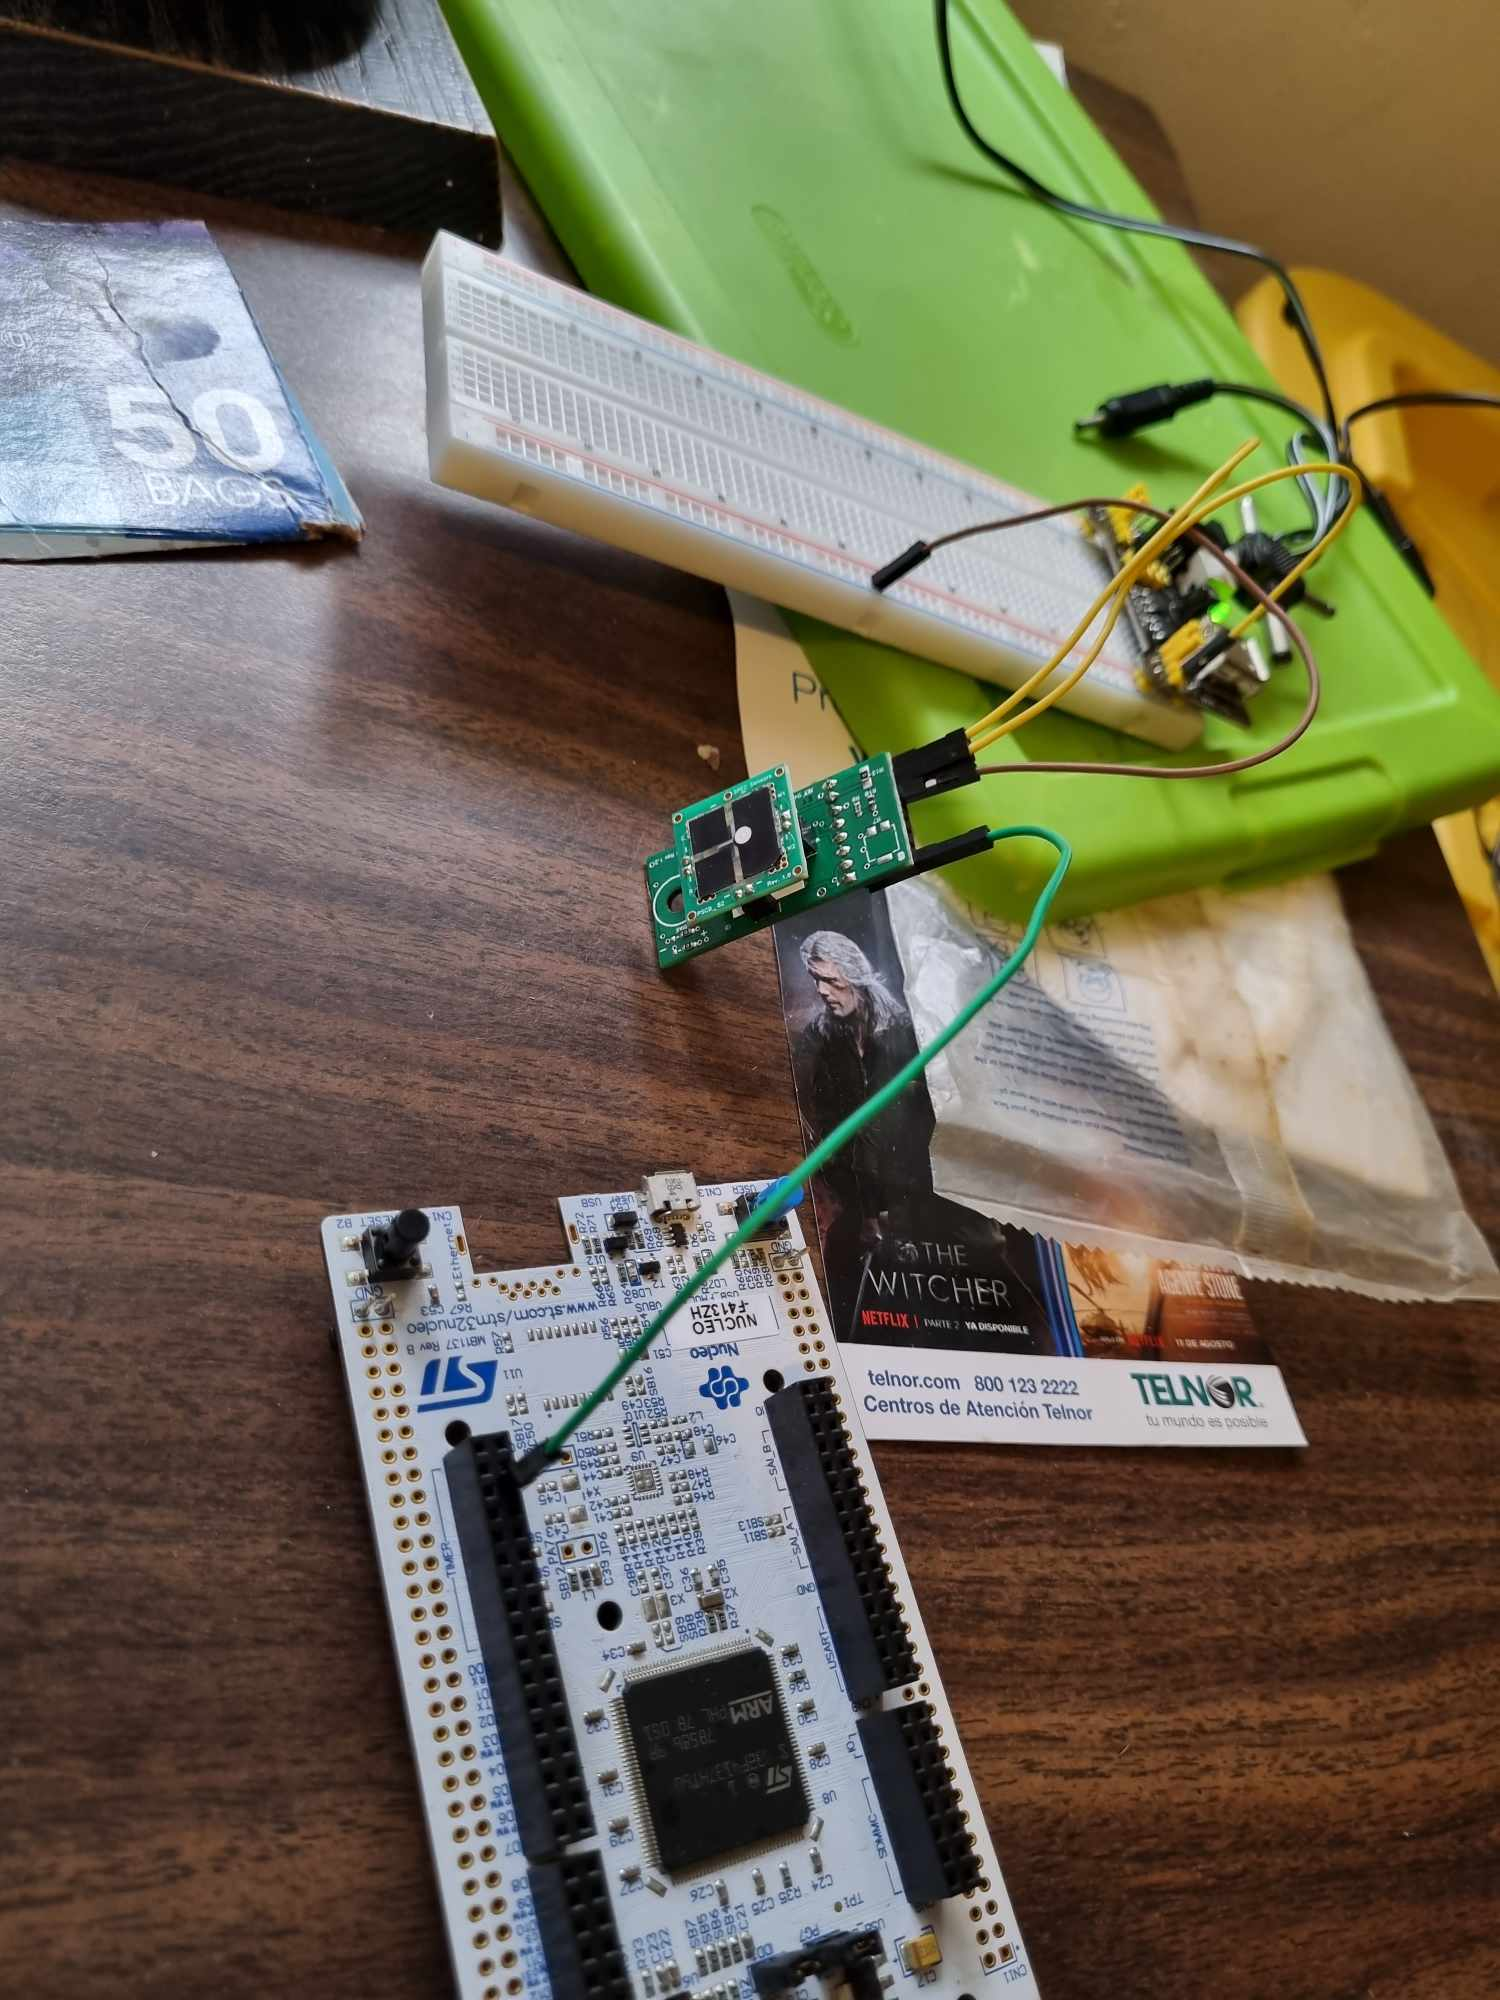

## **Resultados**

**Los resultados están en un rango del 0 al 255:**

# Posición 1
233, 164, 78, 44, 183, 73, 181, 161, 160, 127, 220, 247

Tiempo de reacción: aproximadamente 3 segundos

# Posición 2
186, 94, 80, 203, 246, 22, 26, 148, 31, 29, 62, 157, 150, 64

Tiempo de reacción: aproximadamente 5 segundos

# Posición 3
108, 197, 236, 210, 168, 135, 43, 222, 43, 181, 198, 151, 208, 87

Tiempo de reacción: aproximadamente 4 segundos

# **Conclusión**

Al hacer el experimento nos dimos cuenta que la detección del alcohol va a depender de su concentración y la cercanía, por eso la posiciones que donde se simula la boca más cercana al sensor tardaron menos en registrar los valores, en cambio entre más lejos la boca este del sensor, es más díficil para el sensor captar la señal, por eso la posición que simula el télefono en paralelo a la boca tardo más en registrar.